Heart Disease Prediction

In [ ]:
!pip install mlflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

import mlflow
import mlflow.sklearn
import joblib

In [ ]:
# =========================
# LOAD DATASET
# =========================
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

df = pd.read_csv(url, names=columns)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# =========================
# DATA INSPECTION
# =========================
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [ ]:
# =========================
# DATA CLEANING
# =========================
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric)
df['target'] = (df['target'] > 0).astype(int)
df.fillna(df.median(), inplace=True)
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


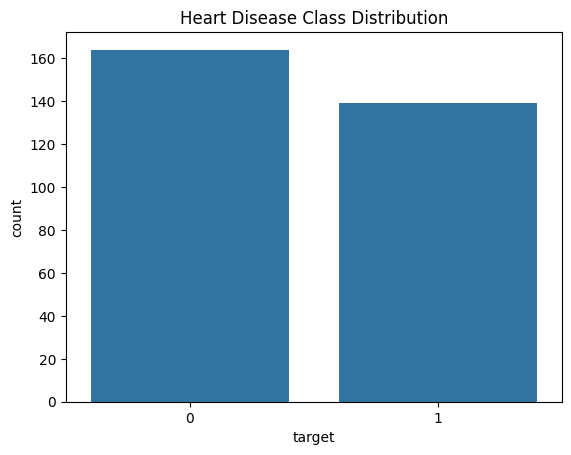

In [ ]:
# =========================
# EDA – CLASS DISTRIBUTION
# =========================
sns.countplot(x='target', data=df)
plt.title("Heart Disease Class Distribution")
plt.show()

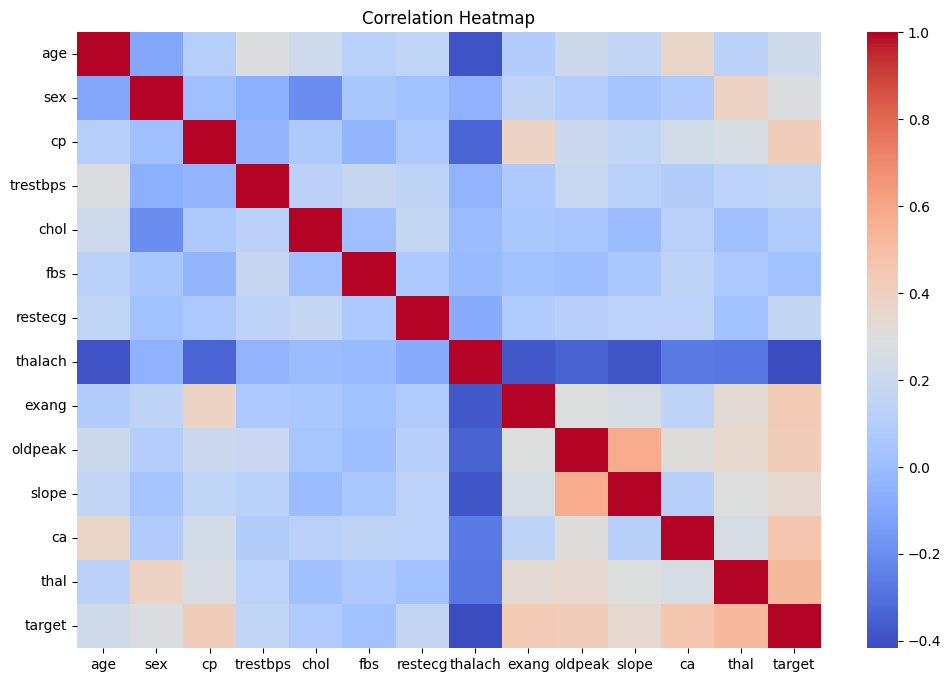

In [ ]:
# =========================
# EDA – CORRELATION HEATMAP
# =========================
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# =========================
# FEATURE / TARGET SPLIT
# =========================
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# =========================
# TRAIN-TEST SPLIT
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
# =========================
# PREPROCESSING PIPELINE
# =========================
preprocessor = Pipeline([
    ('scaler', StandardScaler())
])

In [ ]:
# =========================
# LOGISTIC REGRESSION MODEL
# =========================
log_reg_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
# =========================
# RANDOM FOREST MODEL
# =========================
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
# =========================
# MODEL EVALUATION (LOGISTIC REGRESSION)
# =========================
preds = log_reg_pipeline.predict(X_test)
probs = log_reg_pipeline.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))
print("ROC-AUC:", roc_auc_score(y_test, probs))

Accuracy: 0.8688524590163934
Precision: 0.8125
Recall: 0.9285714285714286
ROC-AUC: 0.9512987012987013


In [ ]:
# =========================
# MLFLOW EXPERIMENT TRACKING
# =========================
mlflow.set_experiment("Heart Disease Prediction")

with mlflow.start_run():
    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_metric("accuracy", accuracy_score(y_test, preds))
    mlflow.log_metric("roc_auc", roc_auc_score(y_test, probs))
    mlflow.sklearn.log_model(log_reg_pipeline, "model")

2026/01/05 11:23:23 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/01/05 11:23:24 INFO mlflow.store.db.utils: Updating database tables
2026/01/05 11:23:24 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/05 11:23:24 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/05 11:23:24 INFO alembic.runtime.migration: Running upgrade  -> 451aebb31d03, add metric step
2026/01/05 11:23:24 INFO alembic.runtime.migration: Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
2026/01/05 11:23:24 INFO alembic.runtime.migration: Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
2026/01/05 11:23:25 INFO alembic.runtime.migration: Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
2026/01/05 11:23:25 INFO alembic.runtime.migration: Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
2026/01/05 11:23:25 INFO alembic.runtime.migration: Running 

In [ ]:
# =========================
# FINAL MODEL
# =========================
joblib.dump(log_reg_pipeline, "model.joblib")

['model.joblib']

# Testing Locally

In [ ]:
!pip install fastapi uvicorn joblib

In [ ]:
import joblib

# Load your saved model
model = joblib.load("model.joblib")

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel

app = FastAPI(title="Heart Disease Prediction API")

# Define input data structure
class HeartInput(BaseModel):
    age: int
    sex: int
    cp: int
    trestbps: int
    chol: int
    fbs: int
    restecg: int
    thalach: int
    exang: int
    oldpeak: float
    slope: int
    ca: int
    thal: int

@app.post("/predict")
def predict_heart_disease(data: HeartInput):
    # Convert input to DataFrame with column names (matches training)
    input_df = pd.DataFrame([{
        "age": data.age,
        "sex": data.sex,
        "cp": data.cp,
        "trestbps": data.trestbps,
        "chol": data.chol,
        "fbs": data.fbs,
        "restecg": data.restecg,
        "thalach": data.thalach,
        "exang": data.exang,
        "oldpeak": data.oldpeak,
        "slope": data.slope,
        "ca": data.ca,
        "thal": data.thal
    }])

    # Make prediction
    prediction = model.predict(input_df)[0]
    return {"prediction": int(prediction)}

In [ ]:
from fastapi.testclient import TestClient

client = TestClient(app)

# List of test inputs
test_inputs = [
    # Input likely to predict 0 (no heart disease)
    {
        "age": 55,
        "sex": 1,
        "cp": 3,
        "trestbps": 140,
        "chol": 250,
        "fbs": 0,
        "restecg": 1,
        "thalach": 150,
        "exang": 0,
        "oldpeak": 1.5,
        "slope": 2,
        "ca": 0,
        "thal": 2
    },
    # Input likely to predict 1 (heart disease)
    {
        "age": 60,
        "sex": 1,
        "cp": 4,
        "trestbps": 160,
        "chol": 300,
        "fbs": 1,
        "restecg": 2,
        "thalach": 120,
        "exang": 1,
        "oldpeak": 2.5,
        "slope": 3,
        "ca": 2,
        "thal": 3
    }
]

# Loop through each test input and get prediction
for i, data in enumerate(test_inputs, start=1):
    response = client.post("/predict", json=data)
    print(f"Test Case {i} Prediction: {response.json()}")

Test Case 1 Prediction: {'prediction': 0}
Test Case 2 Prediction: {'prediction': 1}
